# Classification: ID3 and CART


Dataset: Data is about social Network Advertisement. Dataset is based on information of
users who bought SUV car through social network advertisement. It will classify the
customers who bought SUV and who didn’t buy SUV according to the attributes.

Datapoints: 400

Attributes: UserID, Gender, Age, Estimated Salary, Purchased.
UserID, Age and Estimated salary are numeric datatype.
Gender and purchased are nominal datatype.

If purchased = 0, then this means that user didn't bought the car. if purchased = 1, then user
bought the SUV car.

ID3 Algorithm: The method is used for decision tree classification which uses the notion of information gain which is defined in terms of entropy. Entropy is the fundamental quantity in information theory.

Information gain = Entropy of attribute – weighted average of Entropy of each child set.

Accuracy is computed with Social_Network_Ads dataset for ID3 algorithm is 91.25%.



# CART: Classification and Regression Tree



Classification tree: where the target variable is categorical and the tree is used to identify the
class within which a target variable would likely fall into.
Regression tree: where the target variable is continuous and tree is used to predict its value.

Gini index is used by CART algorithm. It stores sum of squared probabilities of each class.

Gini = 1 – Σ (Pi)2 for i=1 to number of classes
Accuracy computed by CART algorithm is 88.75% with the above dataset.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,precision_score, recall_score, f1_score, precision_recall_curve
from matplotlib import pyplot as plt

In [25]:
bank_df = pd.read_csv("bank.csv")

In [26]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [27]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [28]:
bank_df.isnull().values.any()


False

In [29]:
bank_df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [30]:
def encode (col_name) :
    col_cats = list(bank_df[col_name].unique())
    col_encoded = {}
    for i in range (len(col_cats)) :
        col_encoded[col_cats[i]] = i
    return (col_encoded)


In [31]:
categorical_columns = list(bank_df.select_dtypes(exclude=["number"]).columns)


In [32]:
cleanup_nums = {}
for i in categorical_columns :
    cleanup_nums[i] = encode(i)


In [33]:
bank_df.replace(cleanup_nums, inplace=True)

In [34]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,0,0,0,2343,0,0,0,5,0,1042,1,-1,0,0,0
1,56,0,0,0,0,45,1,0,0,5,0,1467,1,-1,0,0,0
2,41,1,0,0,0,1270,0,0,0,5,0,1389,1,-1,0,0,0
3,55,2,0,0,0,2476,0,0,0,5,0,579,1,-1,0,0,0
4,54,0,0,1,0,184,1,0,0,5,0,673,2,-1,0,0,0


In [35]:
X = bank_df.iloc[:,0:16]
Y = bank_df.iloc[:,16:]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True,test_size = 0.2, random_state=90)


In [37]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 42)
clf_gini = DecisionTreeClassifier(criterion="gini", random_state = 42)


In [38]:
 # Predicting and calculating accuracy for entropy based decision tree
clf_entropy.fit(x_train, y_train)
y_pred = clf_entropy.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print ("Accuracy is ", acc)


Accuracy is  0.8141513658755039


In [39]:
 print ("\n======== Confusion Matrix =========")
conf_matrix = confusion_matrix(y_test, y_pred)
print (conf_matrix)
print ("\n======== Precision and Recall Scores =========")
print ("Precision : ", precision_score(y_test, y_pred))
print ("Recall : ", recall_score(y_test, y_pred))
print ("\n======== F1 Score =========")
print ("F1 Score : ", f1_score(y_test, y_pred))
y_scores = cross_val_predict(clf_entropy, x_train, y_train, cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)



======== Confusion Matrix =========
[[857 225]
 [190 961]]

======== Precision and Recall Scores =========
Precision :  0.8102866779089376
Recall :  0.8349261511728931

======== F1 Score =========
F1 Score :  0.8224219084296106



======== Precision Recall Curve =========


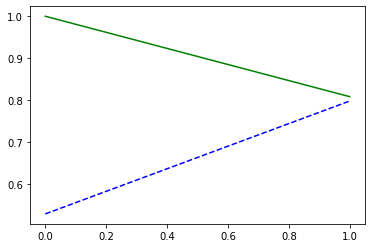


======== ROC Curve =========


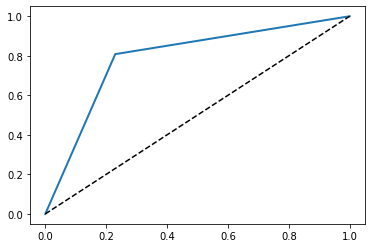

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
print ("\n======== Precision Recall Curve =========")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagon
print ("\n======== ROC Curve =========")
plot_roc_curve(fpr, tpr)
plt.show()

In [41]:
 # Predicting and calculating accuracy for entropy based decision tree
clf_gini.fit(x_train, y_train)
y_pred = clf_gini.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print ("Accuracy is ", acc)

Accuracy is  0.7899686520376176



======== Confusion Matrix =========
[[812 270]
 [199 952]]

======== Precision and Recall Scores =========
Precision :  0.779050736497545
Recall :  0.8271068635968722

======== F1 Score =========
F1 Score :  0.8023598820058996

======== Precision Recall Curve =========


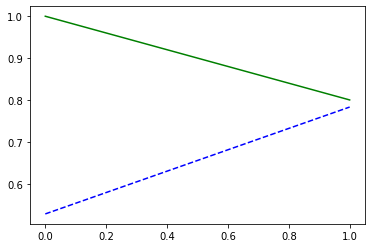


======== ROC Curve =========


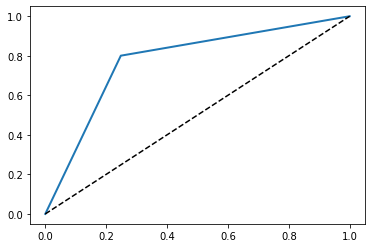

In [42]:
print ("\n======== Confusion Matrix =========")
conf_matrix = confusion_matrix(y_test, y_pred)
print (conf_matrix)
print ("\n======== Precision and Recall Scores =========")
print ("Precision : ", precision_score(y_test, y_pred))
print ("Recall : ", recall_score(y_test, y_pred))
print ("\n======== F1 Score =========")
print ("F1 Score : ", f1_score(y_test, y_pred))
y_scores = cross_val_predict(clf_gini, x_train, y_train, cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
print ("\n======== Precision Recall Curve =========")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print ("\n======== ROC Curve =========")
plot_roc_curve(fpr, tpr)
plt.show()
